In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
aus=pd.read_table('./Australian/australian.dat', header=None,sep=' ')

In [4]:
colnames=['A1','A2','A3','A4','A5','A6','A7','A8','A9','A10','A11','A12','A13','A14','Label']
aus.columns=colnames
aus.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Label
0,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [5]:
for column in list(aus.columns[aus.isnull().sum() > 0]):
    mean_val = aus[column].mean()
    aus[column].fillna(mean_val, inplace=True)

In [6]:
aus['Label'].value_counts()

0    383
1    307
Name: Label, dtype: int64

In [7]:
aus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      690 non-null    int64  
 1   A2      690 non-null    float64
 2   A3      690 non-null    float64
 3   A4      690 non-null    int64  
 4   A5      690 non-null    int64  
 5   A6      690 non-null    int64  
 6   A7      690 non-null    float64
 7   A8      690 non-null    int64  
 8   A9      690 non-null    int64  
 9   A10     690 non-null    int64  
 10  A11     690 non-null    int64  
 11  A12     690 non-null    int64  
 12  A13     690 non-null    int64  
 13  A14     690 non-null    int64  
 14  Label   690 non-null    int64  
dtypes: float64(3), int64(12)
memory usage: 81.0 KB


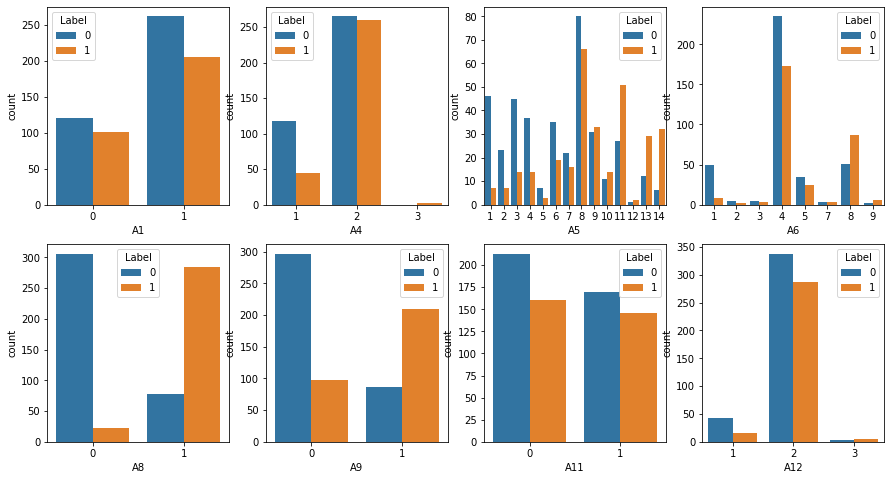

In [8]:
aus_cate=aus.copy(deep=True)
aus_cate=aus_cate.drop(columns=['A2', 'A3','A7','A10','A13','A14'])
fig, ax = plt.subplots(2, 4, figsize=(15, 8))
for i in range(2):
    for j in range(4):
        sns.countplot(x=aus_cate.iloc[:,i*4+j], data=aus_cate, ax=ax[i,j],hue= 'Label')

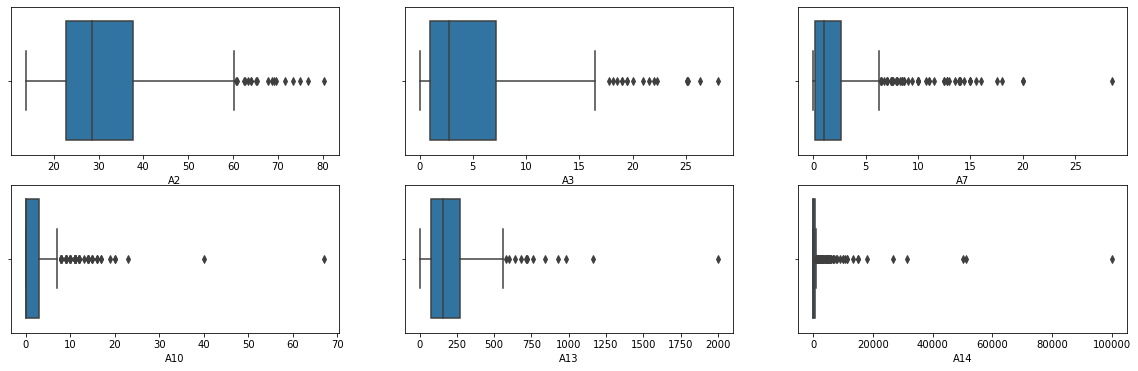

In [9]:
aus_num=aus.copy(deep=True)
aus_num=aus_num[['A2', 'A3','A7','A10','A13','A14','Label']]
fig, ax = plt.subplots(2, 3, figsize=(20, 6))
for i in range(2):
    for j in range(3):
        sns.boxplot(x=aus_num.iloc[:,i*3+j], data=aus_num, ax=ax[i,j],hue="Label")

In [9]:
aus_num.corr()

,A2,A3,A7,A10,A13,A14,Label
A2,1.000000,0.201315,0.392788,0.185574,-0.077159,0.018539,0.161626
A3,0.201315,1.000000,0.298902,0.271207,-0.222346,0.123121,0.206294
A7,0.392788,0.298902,1.000000,0.322330,-0.076389,0.051345,0.322475
A10,0.185574,0.271207,0.322330,1.000000,-0.119808,0.063692,0.406410
A13,-0.077159,-0.222346,-0.076389,-0.119808,1.000000,0.065609,-0.099972
A14,0.018539,0.123121,0.051345,0.063692,0.065609,1.000000,0.175657
Label,0.161626,0.206294,0.322475,0.406410,-0.099972,0.175657,1.000000


In [10]:
aus_num.describe()

,A2,A3,A7,A10,A13,A14,Label
count,690.000000,690.000000,690.000000,690.00000,690.000000,690.000000,690.000000
mean,31.568203,4.758725,2.223406,2.40000,184.014493,1018.385507,0.444928
std,11.853273,4.978163,3.346513,4.86294,172.159274,5210.102598,0.497318
min,13.750000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000
25%,22.670000,1.000000,0.165000,0.00000,80.000000,1.000000,0.000000
50%,28.625000,2.750000,1.000000,0.00000,160.000000,6.000000,0.000000
75%,37.707500,7.207500,2.625000,3.00000,272.000000,396.500000,1.000000
max,80.250000,28.000000,28.500000,67.00000,2000.000000,100001.000000,1.000000


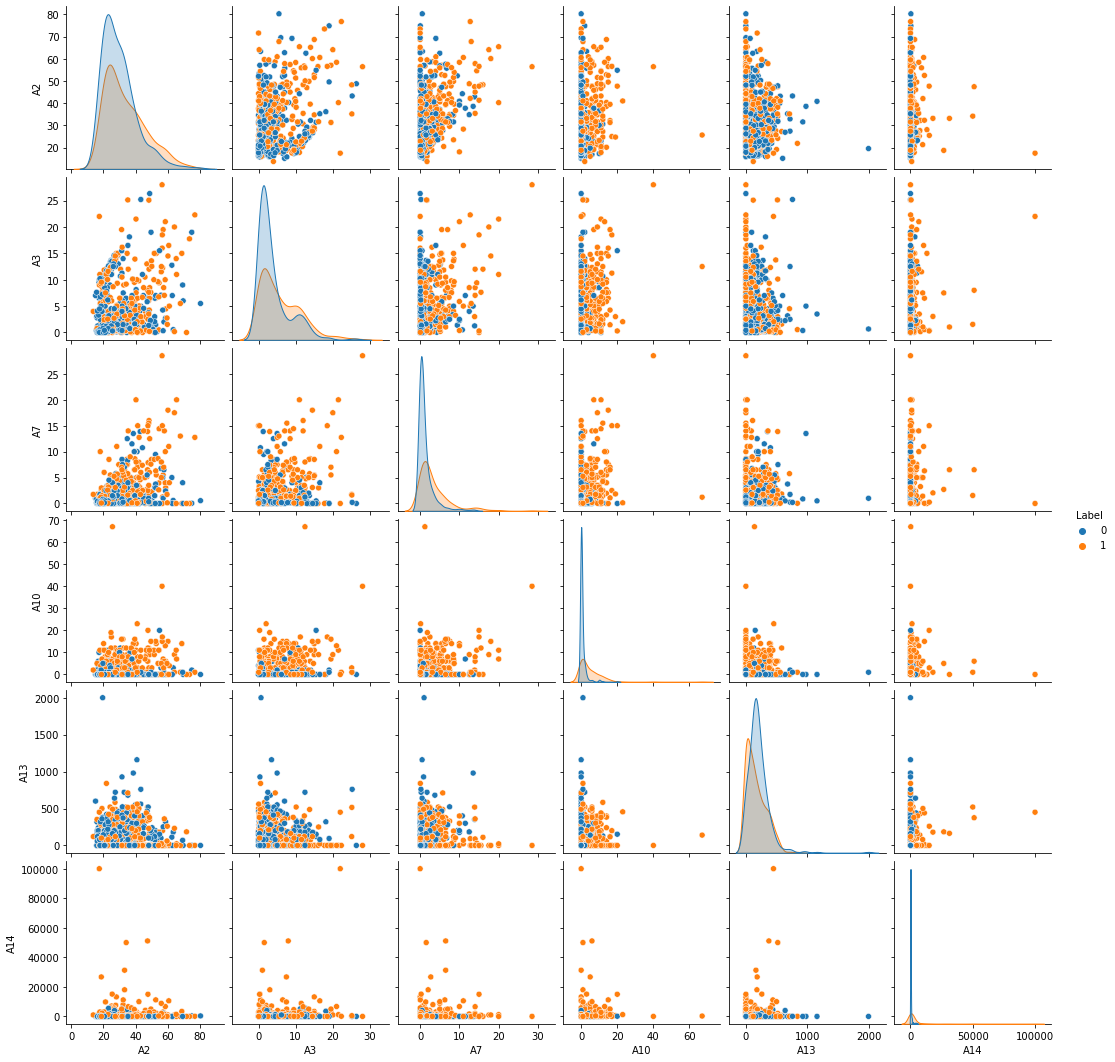

In [11]:
sns.pairplot(aus_num,hue="Label")

In [7]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler


In [8]:
#preprocessing
#normalize numerical, category:one hot
aus_pre=aus.copy(deep=True)
aus_pre=aus_pre.drop(columns=['Label'])
pre_aus=StandardScaler().fit_transform(aus_pre)
pre_aus=pd.DataFrame(pre_aus,columns = aus_pre.select_dtypes(include='number').columns)
pre_aus=pd.concat([pre_aus, aus[['Label']]], axis=1)

In [9]:
from sklearn.ensemble import RandomForestClassifier
X, y = pre_aus.loc[:, np.delete(pre_aus.columns.values, 
                                        np.where(pre_aus.columns.values == ['Label']))], \
        pre_aus.loc[:, 'Label']

# train on randomForest to get important features
clf = RandomForestClassifier(n_estimators=100, max_depth=2,
                             random_state=0)
clf.fit(X, y) 

feature_importances = pd.DataFrame(sorted(zip(pre_aus.columns, clf.feature_importances_), key=lambda x: x[1] * -1),
                                    columns = ['feature','importance'])


In [10]:
print(feature_importances)

   feature  importance
0       A8    0.323317
1      A10    0.193985
2       A9    0.182612
3       A7    0.087814
4      A14    0.073975
5       A5    0.040311
6       A3    0.035593
7      A13    0.033451
8       A6    0.011390
9       A2    0.007983
10      A4    0.006938
11     A12    0.001469
12     A11    0.001162
13      A1    0.000000


In [11]:
top_features = feature_importances[feature_importances.importance>0]['feature'].values

X, y = pre_aus.loc[:,top_features], pre_aus.loc[:,'Label']

In [12]:
y=y*(-1)+1
#0 po 1 ne
#0 po -1 ne
#+1

In [13]:
from sklearn.model_selection import train_test_split, KFold,cross_val_score,StratifiedKFold, GridSearchCV
from imblearn.over_sampling import SMOTE

In [14]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0,stratify = y)
sm = SMOTE(random_state=0,sampling_strategy=1)
x_train_b, y_train_b = sm.fit_resample(x_train, y_train.ravel())

In [15]:
unique, counts = np.unique(y_train_b, return_counts=True)
dict(zip(unique, counts))

{0: 306, 1: 306}

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score, recall_score, precision_score,make_scorer,confusion_matrix,brier_score_loss,accuracy_score
from sklearn import metrics
from scipy.stats import ks_2samp

In [17]:
def ks_stat(y, yhat):
    return ks_2samp(yhat[y==1], yhat[y!=1]).statistic
ks_scorer = make_scorer(ks_stat,greater_is_better=True)

In [18]:
brier_scorer=make_scorer(brier_score_loss,greater_is_better=False)

In [19]:
def type2_calcu(y,yhat):
    confusion =confusion_matrix(y,yhat)
    #[row, column]
    TP = confusion[1, 1]
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0]
    return FP / float(FP + TN)
def type1_calcu(y,yhat):
    confusion =confusion_matrix(y,yhat)
    #[row, column]
    TP = confusion[1, 1]
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0]
    return FN / float(TP + FN)
recall_scorer=make_scorer(recall_score,pos_label=1)
#specificity
type1_scorer_r=make_scorer(recall_score,pos_label=0)
type2_scorer=make_scorer(type2_calcu)

In [20]:
import xgboost as xgb
import lightgbm as lgb

In [21]:
def scores(model):
    train=[]
    test=[]
    y_train_c=model.predict(x_train)
    y_train_pre=model.predict_proba(x_train)
    y_pred_c=model.predict(x_test)
    y_pred = model.predict_proba(x_test)
    #roc
    train.append(roc_auc_score(y_train,y_train_pre[:,1]))
    test.append(roc_auc_score(y_test, y_pred[:, 1]))
    #ks
    train.append(ks_stat(y_train,y_train_pre[:,1]))
    test.append(ks_stat(y_test, y_pred[:, 1]))
    #brier
    train.append(brier_score_loss(y_train,y_train_pre[:,1]))
    test.append(brier_score_loss(y_test, y_pred[:, 1]))
    #acc
    train.append(accuracy_score(y_train,y_train_c))
    test.append(accuracy_score(y_test, y_pred_c))
    #t1
    train.append(type1_calcu(y_train,y_train_c))
    test.append(type1_calcu(y_test, y_pred_c))
    #t2
    train.append(type2_calcu(y_train,y_train_c))
    test.append(type2_calcu(y_test, y_pred_c))
    return train,test

In [ ]:
models=[]
xgb_params = {'learning_rate': [0.01],'max_depth': range(1,10),'subsample': [0.5, 1]}
svc_params = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
lr_params={'penalty':('l1', 'l2'),'C':np.logspace(-2,2,10,base=10)}
dt_params={'max_depth':[2,4,6,8,10,12],'min_samples_leaf':[1,3,5,7]}
rf_params={'max_depth': list(range(1,20)),'min_samples_leaf': [1, 2, 4], 'min_samples_split': [2, 5, 10], 'n_estimators':range(1,20)}
nb_p={}

models.append(('svc',svc_params,SVC(probability=True)))
models.append(('xgb',xgb_params,xgb.XGBClassifier()))
models.append(('LR',lr_params,LogisticRegression()))
models.append(('DT',dt_params,DecisionTreeClassifier()))
models.append(('RF',rf_params,RandomForestClassifier()))
models.append(('nb',nb_p,GaussianNB()))

results=[]
for model_name, parameters, model in models:
    skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1234)
    clf = GridSearchCV(model, parameters, cv=skf,scoring='roc_auc')
    clf.fit(x_train, y_train)
    print('For ',model_name,', the best parameters: ', clf.best_params_)
    results.append(scores(clf))
    
results=pd.DataFrame(results)

For  svc , the best parameters:  {'C': 1, 'kernel': 'linear'}
For  xgb , the best parameters:  {'learning_rate': 0.01, 'max_depth': 3, 'subsample': 0.5}


/Users/weixiao/miniforge3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
100 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/weixiao/miniforge3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/weixiao/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/weixiao/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 6

For  LR , the best parameters:  {'C': 100.0, 'penalty': 'l2'}
For  DT , the best parameters:  {'max_depth': 4, 'min_samples_leaf': 5}


In [24]:
results.columns=list('xc')
results.head()

,x,c
0,"[0.938001487858016, 0.7855890323609118, 0.1101...","[0.9112199276133702, 0.7061954439003619, 0.127..."
1,"[0.9648626388224667, 0.7977841543121313, 0.106...","[0.9006812859271877, 0.7396210347030019, 0.129..."
2,"[0.946702800361337, 0.7724374302566555, 0.0879...","[0.9067489887162018, 0.7423887587822015, 0.110..."
3,"[0.9652213188798555, 0.802088315000797, 0.0688...","[0.883223334043006, 0.6972535661060251, 0.1270..."
4,"[0.9533516658695999, 0.8110154630958074, 0.086...","[0.8799233553331914, 0.6706408345752608, 0.129..."


In [25]:
def split_col(data, columns):
    for c in columns:
        new_col = data.pop(c)
        max_len = max(list(map(len, new_col.values)))  # 最大长度
        new_col = new_col.apply(lambda x: x + [None]*(max_len - len(x)))  # 补空值，None可换成np.nan
        new_col = np.array(new_col.tolist()).T  # 转置
        for i, j in enumerate(new_col):
            data[c + str(i)] = j


split_col(results, columns=['x','c'])

,x0,x1,x2,x3,x4,x5,c0,c1,c2,c3,c4,c5
0,0.938001,0.785589,0.110168,0.860507,0.202614,0.060976,0.911220,0.706195,0.127989,0.840580,0.194805,0.114754
1,0.964863,0.797784,0.106170,0.894928,0.098039,0.113821,0.900681,0.739621,0.129027,0.840580,0.142857,0.180328
2,0.946703,0.772437,0.087938,0.873188,0.127451,0.126016,0.906749,0.742389,0.110573,0.862319,0.142857,0.131148
3,0.965221,0.802088,0.068884,0.903986,0.071895,0.126016,0.883223,0.697254,0.127010,0.818841,0.129870,0.245902
4,0.953352,0.811015,0.086811,0.900362,0.065359,0.142276,0.879923,0.670641,0.129430,0.826087,0.103896,0.262295
5,0.911340,0.730831,0.149870,0.822464,0.081699,0.296748,0.859272,0.693208,0.174133,0.789855,0.129870,0.311475


In [27]:
colnames=['train_auc','train_k-s','train_brier','train_acc','train_t1','train_t2','test_auc','test_k-s','test_brier','test_acc','test_t1','test_t2']
results.columns=colnames
results

,train_auc,train_k-s,train_brier,train_acc,train_t1,train_t2,test_auc,test_k-s,test_brier,test_acc,test_t1,test_t2
0,0.938001,0.785589,0.110168,0.860507,0.202614,0.060976,0.911220,0.706195,0.127989,0.840580,0.194805,0.114754
1,0.964863,0.797784,0.106170,0.894928,0.098039,0.113821,0.900681,0.739621,0.129027,0.840580,0.142857,0.180328
2,0.946703,0.772437,0.087938,0.873188,0.127451,0.126016,0.906749,0.742389,0.110573,0.862319,0.142857,0.131148
3,0.965221,0.802088,0.068884,0.903986,0.071895,0.126016,0.883223,0.697254,0.127010,0.818841,0.129870,0.245902
4,0.953352,0.811015,0.086811,0.900362,0.065359,0.142276,0.879923,0.670641,0.129430,0.826087,0.103896,0.262295
5,0.911340,0.730831,0.149870,0.822464,0.081699,0.296748,0.859272,0.693208,0.174133,0.789855,0.129870,0.311475


In [34]:
results.to_csv('unbalanced-aus.csv')

In [35]:
x_train=x_train_b
y_train=y_train_b

smote

In [36]:
models=[]
xgb_params = {'learning_rate': [0.01],'max_depth': range(1,10),'subsample': [0.5, 1]}
svc_params = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
lr_params={'penalty':('l1', 'l2'),'C':np.logspace(-2,2,10,base=10)}
dt_params={'max_depth':[2,4,6,8,10,12],'min_samples_leaf':[1,3,5,7]}
rf_params={'max_depth': list(range(1,20)),'min_samples_leaf': [1, 2, 4], 'min_samples_split': [2, 5, 10], 'n_estimators':range(1,20)}
nb_p={}

models.append(('svc',svc_params,SVC(probability=True)))
models.append(('xgb',xgb_params,xgb.XGBClassifier()))
models.append(('LR',lr_params,LogisticRegression()))
models.append(('DT',dt_params,DecisionTreeClassifier()))
models.append(('RF',rf_params,RandomForestClassifier()))
models.append(('nb',nb_p,GaussianNB()))

results=[]
for model_name, parameters, model in models:
    skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1234)
    clf = GridSearchCV(model, parameters, cv=skf,scoring='roc_auc')
    clf.fit(x_train, y_train)
    print('For ',model_name,', the best parameters: ', clf.best_params_)
    results.append(scores(clf))
    
results=pd.DataFrame(results)

For  svc , the best parameters:  {'C': 1, 'kernel': 'rbf'}
For  xgb , the best parameters:  {'learning_rate': 0.01, 'max_depth': 6, 'subsample': 0.5}


/Users/weixiao/miniforge3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
100 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/weixiao/miniforge3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/weixiao/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/weixiao/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 6

For  LR , the best parameters:  {'C': 1.6681005372000592, 'penalty': 'l2'}
For  DT , the best parameters:  {'max_depth': 4, 'min_samples_leaf': 7}
For  RF , the best parameters:  {'max_depth': 18, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 18}
For  nb , the best parameters:  {}


In [39]:
#results.columns=list('xc')
#split_col(results, columns=['x','c'])
colnames=['train_auc','train_k-s','train_brier','train_acc','train_t1','train_t2','test_auc','test_k-s','test_brier','test_acc','test_t1','test_t2']
results.columns=colnames
results.to_csv("balanced-aus.csv")

In [ ]:
c = {"mediumpurple","thistle","slateblue","purple","beige","darkslateblue","red","blue"}
def roc_pic(models):
    for model,color in zip(models,c):
        y_pred_c=model.predict(x_test)
        fpr,tpr,thres = metrics.roc_curve(x_test, y_pred_c)
        roc_auc = metrics.auc(fpr1, tpr1)
        plt.figure(figsize=(6,6))
        plt.plot(fpr, tpr, 'b', label = 'Stacking = %0.3f' % roc_auc, color=c)
roc_pic(models)